This demo were derived from the article [Your First Neural Network in PyTorch](https://towardsdatascience.com/your-first-neural-network-in-pytorch-725631ae0fc)

In this demo, we will cover some basic theory of Artificial Neural Networks. The demo is structured as followd
1. Imports and Dataset
2. Train/Test Split
3. Defining a Neural Network Model
4. Model Training
5. Model Evaluation

#Imports and Dataset

For this simple example we’ll use only a couple of libraries:
- `Pandas`: for data loading and manipulation
- `Scikit-learn`: for train-test split
- `Matplotlib`: for data visualization
- `PyTorch`: for model training    

In [3]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


As for the dataset, the Iris dataset, it can be found on this [URL](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Here’s how to import it in Pandas directly:

In [4]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Name']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

What we want to do now is to change, or remap, values from the Name column to something numeric — let’s say 0, 1, 2. Here’s how to do so:

In [6]:
mappings = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica': 2
}
iris['Name'] = iris['Name'].apply(lambda x: mappings[x])

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train/test split

In this section, we’ll use the `Scikit-Learn` library to do a train/test split. Afterward, we’ll convert split data from `Numpy` arrays to PyTorch tensors.

Let’s see how.

To start out, we need to split the Iris dataset into features and target — or X and y. The column `name` will be the target variable and everything else will be a feature (or predictor).

I will also be using a random seed, so you are able to reproduce the results. Here’s the code:

In [11]:
X = iris.drop("Name", axis=1).values
y = iris['Name'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)




# Defining a Neural Network Model

As for the architecture of the model, it will be very simple. Let’s see how the network will be structured:
1. **Fully Connected Layer** (4 input features (number of features in X), 16 output features (arbitrary))
2. **Fully Connected Layer** (16 input features (number of output features from the previous layer), 12 output features (arbitrary))
3. **Output Layer** (12 input features (number of output features from the previous layer), 3 output features (number of distinct classes))

And that’s pretty much it. Besides that, we’ll use Sigmoid for our activation function. Let’s see how to implement this in code:

In [12]:
class ANN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)
        pass 

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.output(x)
        return x

    pass

PyTorch uses this object-orientated way of declaring models, and it’s fairly intuitive. In the constructor, you will define all the layers and their architecture, and in the `forward()` method you will define a forward pass.

As simple as that.

Let’s now make an instance of the model and verify that its architecture matches the one we specified above:

In [13]:
model = ANN()
model

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

Great. Before we can train the model, there’s a couple of more things we need to declare:

- **Criterion**: basically how we measure loss, we’ll use CrossEntropyLoss
- **Optimizer**: optimization algorithm, we’ll use Adam with a learning rate of 0.01

Here’s how to implement it in code:

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Model Training

This part will also be extremely simple. We’ll train the model for 100 epochs, keeping track of time and loss. Every 10 epochs we’ll output to the console the current status — indicating on which epoch are we and what’s the current loss.

Here’s the code:

In [16]:
%%time
epochs = 100
loss_arr = []
for i in range(epochs):
    # predict the result based on current weight matrices 
    y_hat = model.forward(X_train)
    # calculate loss: difference between predicted value and expected value
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)

    if i % 10 == 0:
        print(f'Epoch {i} loss {loss}')
        pass

    # Reset the gradients of all optimized
    # https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
    '''
    Calling optimizer. zero_grad() resets the gradients, ensuring that the 
    subsequent backward pass computes fresh gradients based only on the current 
    batch, preventing unwanted accumulation
    '''
    optimizer.zero_grad()
    # update weight matrices 
    loss.backward()
    # Perform a single optimization step to update parameter.
    optimizer.step()
    pass

Epoch 0 loss 1.2776645421981812
Epoch 10 loss 1.0801856517791748
Epoch 20 loss 1.0376920700073242
Epoch 30 loss 0.9049253463745117
Epoch 40 loss 0.6738568544387817
Epoch 50 loss 0.5133747458457947
Epoch 60 loss 0.4437805116176605
Epoch 70 loss 0.39152538776397705
Epoch 80 loss 0.33211076259613037
Epoch 90 loss 0.2736259996891022
CPU times: total: 359 ms
Wall time: 109 ms


If you’re wondering what these last 3 lines are doing, the answer is simple — backpropagation — ergo updating of weights and biases so the model can actually “learn”.

If plain numbers mean absolutely nothing to you, here’s a visualization of our loss (epoch number on the x-axis and loss on the y-axis):

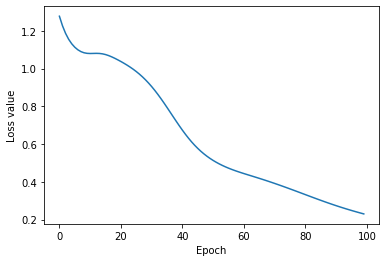

In [21]:
n_arr = [x.detach().numpy() for x in loss_arr]
plt.plot(n_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

# Model Evaluation

In the evaluation process, we want to somehow keep track of predictions made by the model. We’ll need to iterate over the X_test and make a prediction, and then later compare it to the actual value.

We will use `torch.no_grad()` here because we’re just evaluating — there’s no need to update weights and biases.

Anyway, here’s the code:

In [23]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)        
        preds.append(y_hat.argmax().item())
        print(y_hat, y_hat.argmax().item(), y_hat.argmax())
        pass 
    pass 

tensor([-1.4283,  1.8883,  0.8634]) 1 tensor(1)
tensor([ 4.1207,  1.6452, -3.7521]) 0 tensor(0)
tensor([-3.9857,  1.3197,  3.4204]) 2 tensor(2)
tensor([-1.5932,  1.8746,  1.0202]) 1 tensor(1)
tensor([-1.3184,  1.9118,  0.7603]) 1 tensor(1)
tensor([ 4.0841,  1.6504, -3.7253]) 0 tensor(0)
tensor([ 0.8812,  1.9982, -1.1981]) 1 tensor(1)
tensor([-3.0512,  1.6109,  2.4453]) 2 tensor(2)
tensor([-2.5232,  1.7216,  1.9192]) 2 tensor(2)
tensor([ 0.1899,  1.9971, -0.6005]) 1 tensor(1)
tensor([-2.8323,  1.6616,  2.2230]) 2 tensor(2)
tensor([ 4.0749,  1.6506, -3.7182]) 0 tensor(0)
tensor([ 4.1417,  1.6418, -3.7672]) 0 tensor(0)
tensor([ 4.0764,  1.6505, -3.7194]) 0 tensor(0)
tensor([ 4.1198,  1.6449, -3.7512]) 0 tensor(0)
tensor([-1.2154,  1.9243,  0.6627]) 1 tensor(1)
tensor([-3.7566,  1.4012,  3.1741]) 2 tensor(2)
tensor([-0.2205,  1.9787, -0.2358]) 1 tensor(1)
tensor([-1.6563,  1.8590,  1.0799]) 1 tensor(1)
tensor([-3.7562,  1.4012,  3.1739]) 2 tensor(2)
tensor([ 4.0420,  1.6554, -3.6942]) 0 te

The predictions are now stored in the `preds` array. We can now make a Pandas DataFrame with the following 3 attributes:

- `Y`: actual value
- `YHat`: predicted value
- `Correct`: flag, 1 indicating Y and YHat match, 0 otherwise

Here’s the code:

In [24]:
df = pd.DataFrame({'Y': y_test, 'Y_hat': preds})
df['correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['Y_hat'])]
df

,Y,Y_hat,correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1
5,0,0,1
6,1,1,1
7,2,2,1
8,1,2,0
9,1,1,1


In [25]:
print('Accurary', df['correct'].sum()/ len(df))

Accurary 0.9666666666666667
